# Corrélation des posts

Corrélation des posts via les tags.

In [21]:
# from google.colab import files

# files.upload()

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from nltk import RegexpTokenizer
import re

pd.set_option("display.max_columns", None)

datas = pd.read_csv("P5_04_stem_tags.csv")

datas

,Tags,stem_words,imp_words
0,<c#><floating-point><type-conversion><double><...,convert decimal double c# want use track bar c...,convert decimal double c# want track bar chang...
1,<html><css><internet-explorer-7>,width collapse percentage width child element ...,width collapse percentage width child element ...
2,<c#><.net><datetime>,calculate someone age base datetime type birth...,calculate someone age base datetime type give ...
3,<c#><datetime><time><datediff><relative-time-s...,calculate relative time c# give specific datet...,calculate relative time c# give specific datet...
4,<html><browser><timezone><user-agent><timezone...,determine user timezone standards way web serv...,determine user timezone standards way web serv...
...,...,...,...
29096,<c><floating-point><decimal><numbers>,extract decimal part float point number extrac...,extract decimal part float point number extrac...
29097,<flash><swfobject>,flash load twice workaround investigate report...,flash load twice workaround investigate report...
29098,<http><caching><etag><expires-header>,etag vs header expire look around able figure ...,vs header expire look around able figure expir...
29099,<perl><algorithm><string><similarity>,determine longest similar portion several stri...,determine similar portion several string per t...


In [23]:
def tags_transformation(tag, tokenizer):
    words = tokenizer.tokenize(tag)

    return " ".join(words)


In [24]:
# tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+\.*[a-zA-Z0-9]+|\.*[a-zA-Z0-9]+#*-*\+*[a-zA-Z0-9]*')

tmp_tags = datas["Tags"].apply(lambda x: re.sub(r'[<>]', " ", x))

In [25]:
tmp_tags

0         c#  floating-point  type-conversion  double  ...
1                          html  css  internet-explorer-7 
2                                      c#  .net  datetime 
3         c#  datetime  time  datediff  relative-time-s...
4         html  browser  timezone  user-agent  timezone...
                               ...                        
29096                 c  floating-point  decimal  numbers 
29097                                    flash  swfobject 
29098                 http  caching  etag  expires-header 
29099                 perl  algorithm  string  similarity 
29100      algorithm  data-structures  binary-search-tree 
Name: Tags, Length: 29101, dtype: object

In [26]:
tags_df = pd.concat([datas[["stem_words", "imp_words"]], tmp_tags], axis= 1)

In [27]:
tags_df

,stem_words,imp_words,Tags
0,convert decimal double c# want use track bar c...,convert decimal double c# want track bar chang...,c# floating-point type-conversion double ...
1,width collapse percentage width child element ...,width collapse percentage width child element ...,html css internet-explorer-7
2,calculate someone age base datetime type birth...,calculate someone age base datetime type give ...,c# .net datetime
3,calculate relative time c# give specific datet...,calculate relative time c# give specific datet...,c# datetime time datediff relative-time-s...
4,determine user timezone standards way web serv...,determine user timezone standards way web serv...,html browser timezone user-agent timezone...
...,...,...,...
29096,extract decimal part float point number extrac...,extract decimal part float point number extrac...,c floating-point decimal numbers
29097,flash load twice workaround investigate report...,flash load twice workaround investigate report...,flash swfobject
29098,etag vs header expire look around able figure ...,vs header expire look around able figure expir...,http caching etag expires-header
29099,determine longest similar portion several stri...,determine similar portion several string per t...,perl algorithm string similarity


In [28]:
tags_df.to_csv("P5_06_transf_datas.csv", index= False)

# files.download("P5_06_transf_datas.csv")

### Transformation des tags en Bag of Words

In [29]:
samples = np.random.choice(len(tags_df), 10000, replace= False)
df_samples = tags_df.iloc[samples, :].reset_index(drop= True)
df_samples

,stem_words,imp_words,Tags
0,php change array key way change numeric key na...,php change array key way change numeric key na...,php
1,best javascript syntactic sugar rubygems liter...,best javascript rubygems literals var obj obje...,javascript language-features syntactic-sugar
2,silverlight xml editor syntax highlight look s...,silverlight xml editor syntax highlight look s...,silverlight editor controls syntax-highlig...
3,code profiler anybody recommend good code prof...,code profiler anybody recommend good code prof...,c++ windows visual-studio profiler
4,makefile enter key behave like tabs key form e...,makefile enter key behave like tabs key form e...,.net winforms datagridview
...,...,...,...
9995,generate unique reference number strategies hr...,generate unique reference number strategies co...,language-agnostic uniqueidentifier
9996,true different true understand correct exactly...,true different true understand correct exactly...,c++ c
9997,best free plugins eclipse allow format indent ...,best free plugins eclipse allow format indent ...,java eclipse jsp intellij-idea
9998,jquery time picker look fill text input time u...,jquery time picker look fill text input time u...,javascript jquery time


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern= r'[\S]+', dtype= np.int8)

bag_of_words = vectorizer.fit_transform(df_samples["Tags"])

In [59]:
bag_of_words.shape

(10000, 4272)

In [60]:
bow_df = pd.DataFrame(bag_of_words.toarray(), columns= vectorizer.get_feature_names_out())

In [61]:
# bow_df

In [62]:
bow_sum = bow_df.sum()

# print(bow_sum)

In [63]:
bow_sum = bow_sum.reset_index().rename({"index": "tags", 0: "count"}, axis= 1)

bow_sum

,tags,count
0,.emf,1
1,.htaccess,8
2,.htpasswd,1
3,.net,970
4,.net-1.1,1
...,...,...
4267,zipper,1
4268,zombie-process,1
4269,zsh,4
4270,zsi,1


In [64]:
print(f"Il y a {len(bow_sum)} tags uniques.")
tmp_df = bow_sum[bow_sum["count"] == bow_sum["count"].max()].reset_index(drop= True)
print(f"Le mot le plus utilisé est '{tmp_df.loc[0, 'tags']}',\nil apparaît {tmp_df.loc[0, 'count']} fois.")

Il y a 4272 tags uniques.
Le mot le plus utilisé est 'c#',
il apparaît 1379 fois.


In [65]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set("") # set(STOPWORDS)

comment_words = ""

for i in range(len(df_samples)):
    comment_words += df_samples.loc[i, "Tags"] + " "

    if (i +1) % 1000 == 0:
        print(f"{i +1}/{len(df_samples)}")

1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
10000/10000


In [66]:
w_cloud = WordCloud(width= 1600, height= 1600, background_color= "white", 
    stopwords= stopwords, min_font_size= 8).generate(comment_words)

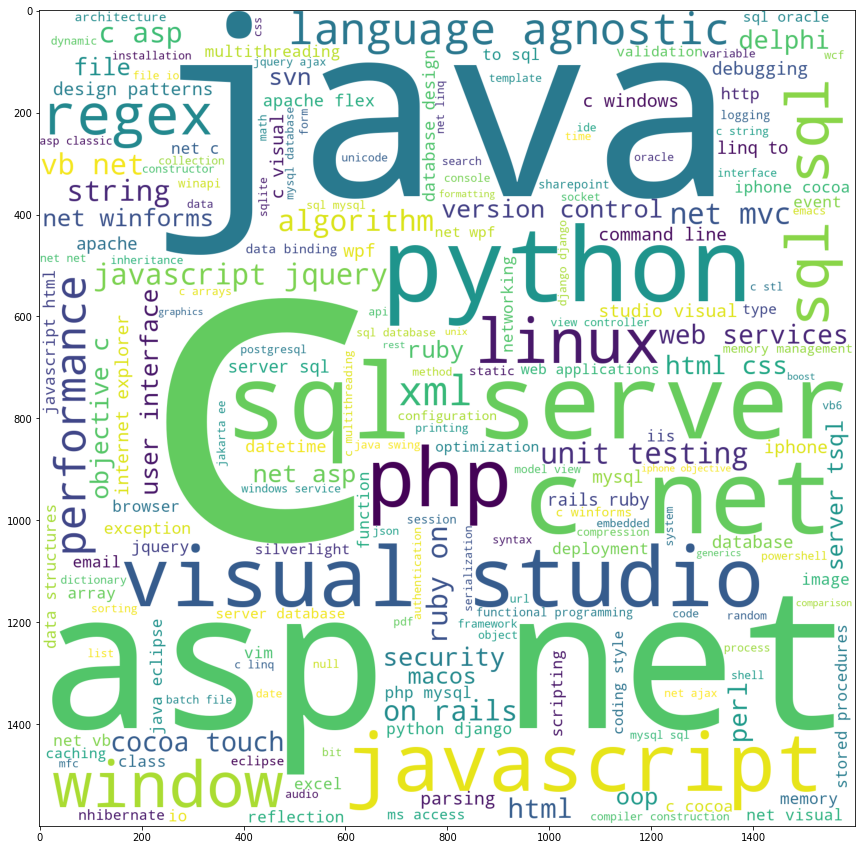

In [67]:
fig = plt.figure(figsize=(15, 15))

plt.imshow(w_cloud)

plt.show()

Les tags les plus mis en avant sont "C", "Java", "asp" et "net".

### Corrélation entre les posts

D'abord, transposition du jeu de données puis calcul des corrélations.

In [68]:
bow_df_T = bow_df.T

# bow_df_T

In [69]:
from scipy.stats import spearmanr

rho, pvalue = spearmanr(bow_df_T)

In [70]:
rho.mean()

0.020833354695243857

En moyenne, les posts ne sont pas corrélés selon leurs tags.

In [71]:
# import seaborn as sns

# plt.figure(figsize=(15, 15))

# sns.heatmap(bow_df_T.corr())

La matrice de corrélation ci_dessus confirme la non-corrélation des posts via leurs tags.

Néanmoins, y a-t-il une ou des composantes principales significatives après un PCA et peut-on voir des clusters clairs?

Suite sur la page précédente